In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Step 2: Load the dataset into a DataFrame
df = pd.read_csv('task-tha.csv')
df['datePosted'] = pd.to_datetime(df['datePosted'])

In [3]:
# Step 3: Analyze and visualize the data
# 3a. Top categories of quests and their average prices
top_categories = df.groupby('genre').agg({'_id': 'count', 'price': 'mean'}).reset_index().sort_values('_id', ascending=False)
print(top_categories)

                     genre   _id       price
4                 Delivery  2539   19.701457
5                  Errands  1960   25.758673
10               Referrals  1292   90.619969
2       Business and Admin  1053  174.986705
0                Academics   995   34.846231
6   Events and Photography   886   49.488713
7             Help Me Sell   760   67.242105
1            Anything Else   498   91.072289
8       Household Services   430   74.486047
3       Business and admin   178   62.117978
9                 Referral     4    8.000000
11              Referrals      1   20.000000


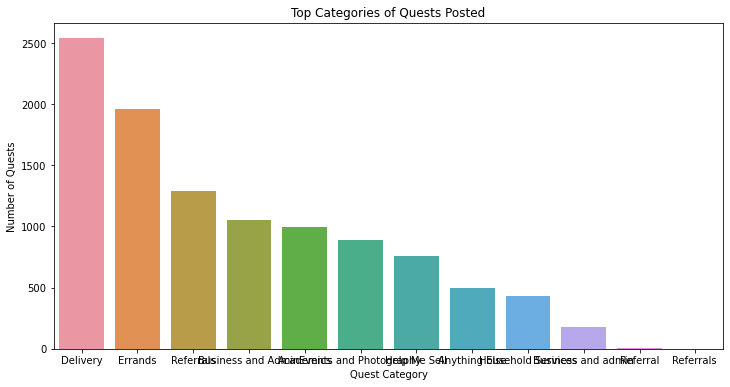

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories, x='genre', y='_id')
plt.title('Top Categories of Quests Posted')
plt.xlabel('Quest Category')
plt.ylabel('Number of Quests')
plt.show()

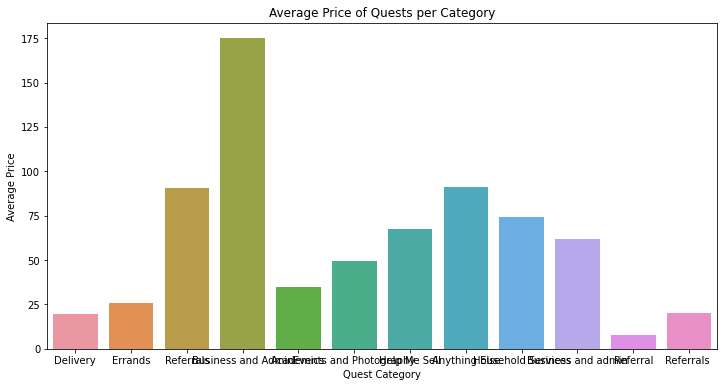

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories, x='genre', y='price')
plt.title('Average Price of Quests per Category')
plt.xlabel('Quest Category')
plt.ylabel('Average Price')
plt.show()

In [6]:
# 3b. Cohort analysis of quests posted per month
df['month_posted'] = df['datePosted'].apply(lambda x: x.strftime('%Y-%m'))
cohort_analysis = df.groupby('month_posted').agg({'_id': 'count'}).reset_index()
print(cohort_analysis)

  month_posted   _id
0      2021-07  1022
1      2021-08  2585
2      2021-09  3574
3      2021-10  3423


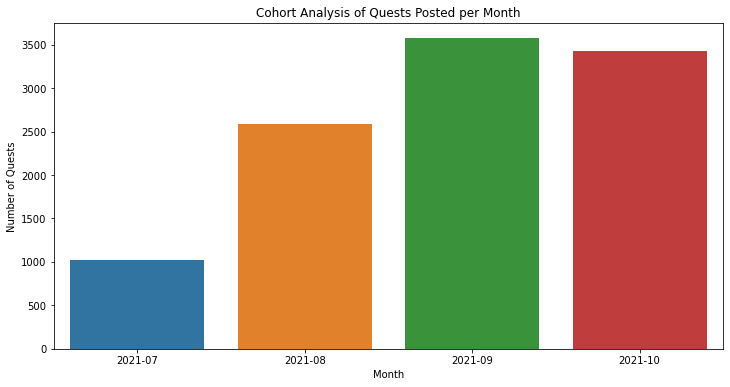

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cohort_analysis, x='month_posted', y='_id')
plt.title('Cohort Analysis of Quests Posted per Month')
plt.xlabel('Month')
plt.ylabel('Number of Quests')
plt.show()

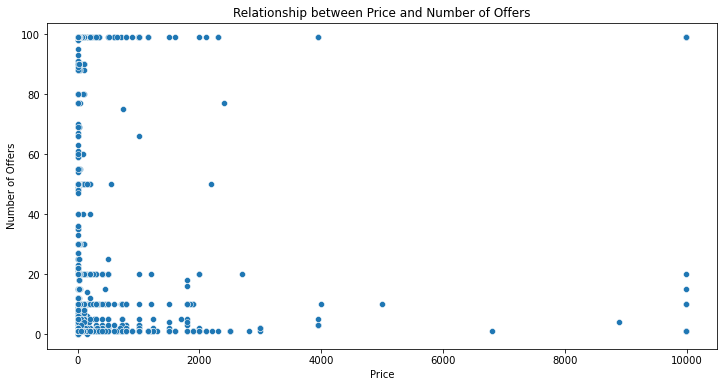

In [8]:
# 3c. One interesting finding
# Example: Investigate the relationship between numOffers and price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='price', y='numOffers')
plt.title('Relationship between Price and Number of Offers')
plt.xlabel('Price')
plt.ylabel('Number of Offers')
plt.show()